In [1]:
from scipy.optimize import dual_annealing as SA
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([-75.42752833631760700000	,	-35.73170156618567700000	,	-57.59564404992896400000	,	38.90984566694638100000	,	52.24768179547371000000	,	-30.36102768668751400000	,	50.69081434743921500000	,	49.79866080539159200000	,	-71.15514747331728500000	,	-30.78367518052391500000	,	-43.00095076744385400000	,	-20.08811847975013600000	,	71.52725626720590000000	,	48.01996280584526700000	,	-46.02767978209127600000	,	-8.16344127119782570000	,	-40.97564427609482600000	,	-13.82735774057519500000	,	35.81657199519561600000	,	57.13778772823900500000	,	58.58538382414337800000	,	-17.41231583039382300000	,	27.28778525609867200000	,	-62.56236356236095700000	,	-28.81691945519519000000	,	-86.52863533939515200000	,	48.29261815940543600000	,	-7.58193513558434520000	,	-82.15963827903034700000	,	-72.07887190439488700000	,	82.24637543803993400000	,	19.58463976668605300000	,	-45.58574317044939800000	,	77.31349810898396400000	,	-12.61296216649972700000	,	-81.18446185521837300000	,	72.87815788145226700000	,	86.08218102836468700000	,	28.40065181524502700000	,	40.85306632671921500000	,	-2.04659282612315960000	,	33.44086955332473100000	,	-24.67059350738992400000	,	-17.82064980833192200000	,	2.58348734627709580000	,	-81.80819521719691100000	,	88.44454517960159000000	,	-34.27036386010883000000	,	-43.83513046650737300000	,	19.81859943695488400000	,	-9.54309784383558220000	,	-14.68097436094271300000	,	-15.86845749872176700000	,	38.53019002322918100000	,	-71.49995986612853500000	,	-21.56900603789443900000	,	45.44109104389457300000	,	-63.14931692986427700000	,	28.95883419613183200000	,	-47.35024058770330400000	,	40.97029901103317700000	,	-43.46420471378949900000	,	-5.48808497136167260000	,	64.35260996276818400000	,	60.01432009545510500000	,	-4.32413237268772830000	,	-28.77578103451707400000	,	7.59854706408303570000	,	11.07048490503399300000	,	76.53919026683303200000	,	-40.60931350662088600000	,	-36.78450251671741700000	,	20.25823569717468300000	,	70.31500798054759100000	,	38.60079731065457100000	,	-53.72994156381800200000	,	-70.52958215448038000000	,	42.84576275877751100000	,	47.16411577649043400000	,	-39.78419283943499400000	,	62.13929772948620200000	,	22.38955521423275700000	,	21.90072345024468300000	,	81.88082587974605500000	,	-36.82563113992598100000	,	23.72765132107693400000	,	5.63297534374048330000	,	66.80984139646716400000	,	15.20214485644626700000	,	18.47374813624628600000	,	-2.13281709629421810000	,	79.67687957507050100000	,	-27.62526013945900900000	,	-54.05573650890518400000	,	-72.34202638267480300000	,	27.38077737473483400000	,	19.07410378865328900000	,	55.99390643347041400000	,	-6.88383580429191970000	,	-73.13042581186947200000	,
-71.51486745560808300000	,	67.41796228587588800000  	,	-79.06392596251242800000	,	62.50279392114856600000	,	-8.26048123249489660000	,	-45.32741587642972500000	,	87.94455445227092100000	,	11.57722895390855900000	,	-50.30438027962135500000	,	67.95149392268055500000	,	40.96145642526502700000	,	63.55518084017873500000	,	-58.01790985174584800000	,	7.25442084872908310000	,	-5.00683510309036710000	,	41.83101133170498500000	,	86.50749829841984700000	,	30.02807286277736400000	,	32.96436527329737500000	,	67.57083460164784600000	,	1.38477000310489020000	,	-5.77927129249788150000	,	-45.92791472106736700000	,	11.88517998335491700000	,	46.93037289035345300000	,	-27.86958409337125200000	,	-9.44152328233548130000	,	2.84194196075296190000	,	-61.67810160437775800000	,	86.55809760472249100000	,	-36.22430979001926900000	,	-62.17159078179375300000	,	78.43288363892068600000	,	31.29507840036721700000	,	-12.97619194279143100000	,	59.90557594549420600000	,	-59.16182696620013800000	,	-10.68442462170746400000	,	45.43947895002205000000	,	20.78925239592848600000	,	-44.24956741530799300000	,	-26.92659083082067900000	,	20.34227115265302600000	,	-29.20959220642732400000	,	24.47857216193635600000	,	2.98879524976874220000	,	3.51640029541997020000	,	22.76085811184788100000	,	80.85396986013194000000	,	-49.77293220069159900000	,	89.03572314129661400000	,	67.93294552756282200000	,	22.67034503725155000000	,	-51.86190513768801200000	,	74.79739631637326600000	,	-65.83477800582161900000	,	84.25171019185646100000	,	21.58309376962311900000	,	25.33874684866633200000	,	-87.55750267250756700000	,	52.11593272253082900000	,	71.91997153975768200000	,	-89.60792480571066700000	,	2.94052746123320220000	,	22.39687920913721100000	,	-42.26593514068981200000	,	-18.18329530419802600000	,	85.97309664957035100000	,	-35.33266465422649800000	,	12.01592232082397500000	,	-51.09798464484854500000	,	-65.62708563602014100000	,	86.15161957137240700000	,	-51.42041967360964300000	,	-65.55827621747363300000	,	-80.52064934370122300000	,	-42.36502809583981100000	,	46.31780002780780600000	,	-11.57535010229422300000	,	1.19846509261235210000	,	-0.94974664489080851000	,	-73.04236347003610800000	,	84.81781582522316400000	,	-13.51798484854887800000	,	-41.36572393959735900000	,	78.34504246716304000000	,	-50.26515746545659600000	,	-55.86851579746234400000	,	-39.49281608589765800000	,	31.33072489945242000000	,	17.67695946716769100000	,	-20.00756222372949400000	,	78.45174264479450700000	,	58.84946228432363600000	,	-80.77042594321798700000	,	58.98637815060297400000	,	-20.19473744892347600000	,	-9.76774877148076830000	,	-88.34912261269298000000	,	-39.56654880979549900000	,
-37.43687743296909800000	,	-12.62017841841367300000	,	36.24055747237207500000   	,	-88.13564134319371100000	,	-47.34060070202942700000	,	-17.73434416676656200000	,	-74.21554273912845200000	,	69.03826883854074500000	,	-11.42777084032160000000	,	-34.41777228304941600000	,	58.36623383246720200000	,	33.74883559030189400000	,	5.47451494488488780000	,	-58.03403688406032800000	,	71.46244469789161300000	,	55.79432578003346100000	,	-19.95680436549201900000	,	-3.78037144573303860000	,	19.33208950981156700000	,	27.34280600690087200000	,	47.25425526288827900000	,	-9.41234321289610420000	,	25.73685016143532800000	,	-39.49501196312525100000	,	-10.20843614430315000000	,	-45.32327897516214000000	,	-62.70861300546066300000	,	-52.82516259692544500000	,	74.54882516509928800000	,	14.86936545047723300000	,	34.79466805460489800000	,	64.16838425594409000000	,	-2.43444038991846410000	,	-28.30817271630741800000	,	-14.64385905011079100000	,	-68.63181284172512200000	,	3.34181926312365360000	,	84.88508186669707800000	,	-30.76688856424215100000	,	-28.94946154294388000000	,	54.33761297790306300000	,	-61.25403500644525000000	,	-61.33620466980887900000	,	-60.54039369718189800000	,	74.58288299985207500000	,	49.50330406317357300000	,	-12.62042764203488300000	,	-43.35183320974587000000	,	22.02971949253279100000	,	87.34488175834962900000	,	24.64722652315605000000	,	-48.04852852829141300000	,	51.20967548121311100000	,	-89.38710957863163700000	,	53.53373034438024500000	,	-52.62218965862494700000	,	-54.08457328630304100000	,	85.96429195986721100000	,	22.15287822559072600000	,	-80.06115456550045900000	,	-64.38629150721364200000	,	-16.58843774271510100000	,	50.06722260021538800000	,	-60.70187297460562800000	,	-85.28297441802170900000	,	63.24349134040477300000	,	-44.47313118559591100000	,	-18.87197883469011100000	,	33.71183519892696300000	,	66.77810085636048100000	,	32.57699916883299800000	,	-64.94404949752633600000	,	13.85808145656508800000	,	33.19435617609616400000	,	-33.08448306737446400000	,	2.13027566416653260000	,	-9.70177198031788630000	,	3.63260494958190350000	,	-24.11426435467805600000	,	27.41546355751155800000	,	66.88070391504268700000	,	66.23504012771593400000	,	5.36481695922853420000	,	82.67666694545681600000	,	16.38284418263246800000	,	-85.80365269851225200000	,	-57.19845455488768200000	,	-5.85588451437563150000	,	20.41524345908945300000	,	-64.86215995439182800000	,	-51.88106032799935700000	,	88.21278763071529700000	,	-30.59263936165443500000	,	-13.34946356978551300000	,	-63.67383233134786700000	,	8.23206385970217980000	,	-73.44396696915598000000	,	-11.70792418444445100000	,	-74.93801619613886100000	,	9.88422499711448670000	,
-86.79148857982214300000	,	25.93879267523958300000  	,	-19.39258503487376100000	,	-31.20486338267510000000	,	-42.33261540328292200000	,	1.85009247387320390000	,	-8.00825332305390700000	,	55.86733261099846000000	,	-5.88205861911782790000	,	3.33109241128522630000	,	-53.44474538767681800000	,	14.51624606760970000000	,	17.58586687783083800000	,	28.18216950681029700000	,	14.66680426030629300000	,	47.49245855648661100000	,	-60.55930736624947000000	,	61.15512050437138200000	,	89.33745294988540300000	,	28.82441992900457700000	,	-67.81435134578760000000	,	15.68454812132976900000	,	-63.67730693045825100000	,	80.95005392172575400000	,	43.55656820035235900000	,	67.06937452842188900000	,	-60.37328840023971600000	,	-4.71871866768105970000	,	-27.60611392724817400000	,	-36.33930780997941700000	,	-82.76785303553265300000	,	-21.31183881346515800000	,	-66.25195399525456700000	,	-64.26264809685160600000	,	-21.24830592128351700000	,	24.62620609862492000000	,	50.46211960142778700000	,	-12.98379325810437000000	,	-59.17546548888069700000	,	-23.99660509744281000000	,	86.00686936504649800000	,	-7.32541094431063300000	,	67.34444726496488400000	,	-62.62415399721795200000	,	-10.35838741640940000000	,	75.74288378918907900000	,	86.47007691351419100000	,	-6.56212859272797290000	,	-27.99169727044378700000	,	-52.29949690769627300000	,	-33.08043547908087600000	,	71.61127079606001200000	,	-77.28474179321291600000	,	-45.37372011603403600000	,	-86.42548891069155600000	,	89.43463025691215800000	,	-71.97645808605568600000	,	75.39500947581311200000	,	-65.87875086223969800000	,	-53.09143814464231100000	,	-60.45243164352259400000	,	49.86940979856027000000	,	10.82536738428400700000	,	29.72000507789408600000	,	67.24161786527000100000	,	19.76914995311116700000	,	78.99096916205383000000	,	-38.59698922193150800000	,	47.68121564507217200000	,	-63.12125906719621300000	,	21.48744621765861500000	,	22.17665043683283000000	,	55.50318085686586800000	,	-32.78582262883300300000	,	-27.25574790753560000000	,	-44.35709799954292300000	,	75.86942834336503000000	,	36.62738638154958400000	,	37.12068972212287600000	,	-62.88897230842559300000	,	36.67205679082687200000	,	-76.71707967474921500000	,	-80.54583669311010400000	,	4.25296892854603930000	,	26.91851672963466100000	,	-47.99076174876964300000	,	-64.77554853503939100000	,	-47.23451760566724300000	,	67.35084324027221200000	,	64.93224725104732900000	,	27.28951917887654600000	,	67.34522916879737400000	,	83.46308314791616600000	,	80.38060950954661600000	,	69.53888680907161300000	,	6.78199524198878120000	,	56.37038073729323200000	,	-46.34966870012489400000	,	-24.48909689531601000000	,	31.95632985722855300000	,
-54.52498935054750000000	,	-54.98772684133307800000	,	9.06862801005291890000      ,	-86.69123936900894000000	,	-61.01747117088049100000	,	6.33053906777584530000	,	-12.94059376545000400000	,	-16.72380376393347500000	,	59.80792581963595500000	,	-55.31392630284865700000	,	32.38846037663456900000	,	75.29782048672365100000	,	-81.68512096558563900000	,	68.55390482881713900000	,	-13.97127537887625700000	,	-7.97671566848629250000	,	21.13009944484295500000	,	43.68744640067367900000	,	89.27789601031503300000	,	77.02940178186372600000	,	-86.56043954666326100000	,	-21.37893284494128900000	,	28.25907889170910900000	,	-84.92062208696329200000	,	20.07474176236682700000	,	4.30899262976059560000	,	22.12743999042479000000	,	-64.89969768364969100000	,	-8.77541598375820800000	,	-16.34996801893804300000	,	73.60827111654845100000	,	-17.79610567573971000000	,	-55.66783279175845000000	,	56.98975737549133700000	,	-13.94103446479563500000	,	-20.55819112951890300000	,	38.89581368524307000000	,	18.94765112812525800000	,	-75.27309726831688900000	,	-66.52692194820315300000	,	-23.78345925994355500000	,	10.81146246093666700000	,	43.23406404282926000000	,	86.84141897066317000000	,	-2.56001635556478390000	,	-89.92976099977022400000	,	50.69848028176036800000	,	-27.50960105991839600000	,	-36.74049332480181100000	,	59.67538194916079400000	,	-72.36844986627335200000	,	-22.70860669244784400000	,	25.24771033212839200000	,	-83.86633822617821500000	,	-32.51091140696026100000	,	83.09793978571272500000	,	29.95148628561530300000	,	-74.43126733390784000000	,	-43.99869469810742800000	,	-64.30660602989473800000	,	-40.08766350844404500000	,	49.76005258576671500000	,	37.43665491972421900000	,	18.52618513786640600000	,	-82.90458161282323600000	,	62.22268968346958200000	,	-48.64656749231794900000	,	-0.88863074266028264000	,	-84.58841194354589300000	,	26.63033819277620800000	,	-17.92022638680371900000	,	48.15267928176308500000	,	-20.90460457352368500000	,	70.45371724977411500000	,	-16.59736639834021300000	,	-22.17052914739400600000	,	-74.07907347727973500000	,	86.86385277045101800000	,	75.90522338939914000000	,	-6.85717599444939200000	,	11.06404348162621400000	,	-1.18998425822610440000	,	88.91588044935679100000	,	-85.37834630608793400000	,	-43.28711304517049300000	,	-31.11070452505015300000	,	-67.88226678327650600000	,	44.26774062907142600000	,	23.28496464535196300000	,	-54.61294193825400400000	,	-6.52164379666538710000	,	-42.12829195108916700000	,	-89.34805827665671500000	,	-69.16370479966816700000	,	10.60483184327736700000	,	70.60838872936801600000	,	72.21716696305449500000	,	35.97891486603455700000	,	-47.92017577145029600000	,	5.31027410545010530000	,
54.85768049635578300000	    ,	35.96686707700406800000   	,	-89.92606537792096300000	,	-38.68593685194068100000	,	-59.25807634241575500000	,	-53.41778955080820200000	,	-72.95751805811632100000	,	-83.03884511041637500000	,	-19.19487046219951800000	,	-47.98137973535197200000	,	-69.72866162920324500000	,	-11.97422876097108700000	,	-39.22088496549136500000	,	63.84502753410100700000	,	-83.73410318893697000000	,	86.82978780434663700000	,	81.93260271929736400000	,	87.19062355840344500000	,	57.38484424663269600000	,	-82.20789401551248000000	,	-37.42600400906038500000	,	40.01348973714979700000	,	-71.20707873869035600000	,	78.37149123967094500000	,	-7.42302694326798470000	,	87.68513269251906200000	,	-15.48598041964041300000	,	55.82618254750050800000	,	-81.03480482141399900000	,	20.90714894778329800000	,	-17.46077251800397800000	,	18.30935070250029600000	,	-48.34146849605969000000	,	59.39176945751950100000	,	-77.52152302283556700000	,	-48.14822194369159500000	,	-2.35959691523369490000	,	80.92758071806176200000	,	-77.77109833652294000000	,	-10.05869920385661900000	,	-52.46850016579400500000	,	55.41169580228404400000	,	0.80789330716558538000	,	48.31803719973913800000	,	-49.97010331304695500000	,	53.95379413886490700000	,	-83.10898870325993900000	,	41.74576562489650700000	,	81.89628921241271100000	,	-30.05572256837101000000	,	-31.05605839681410200000	,	10.65750200952506100000	,	41.14719271566676200000	,	-35.16023954758257700000	,	57.19814948271721300000	,	56.05259432264875800000	,	-2.44614867053007860000	,	-12.21885696610623000000	,	-64.71691206810328400000	,	13.57639749729564500000	,	-53.44864350595104700000	,	-14.82686883016521100000	,	-53.28584282672302700000	,	33.40412336318311800000	,	59.58982713453477200000	,	-38.81264662133434500000	,	-23.03222384572039500000	,	10.21977276982103400000	,	-29.17479740466114900000	,	72.54726303932028500000	,	-47.79734833410465500000	,	-17.31235998727099500000	,	-31.30154368116775700000	,	-18.86804249569088700000	,	-39.53417327870330700000	,	25.60067884121051000000	,	-37.60790286819337800000	,	83.86889770803441000000	,	-16.99584050543803900000	,	-52.23984773522299500000	,	-85.67813990845856200000	,	47.62954583786006400000	,	-10.57947169154211100000	,	-72.92486719164604400000	,	-89.39245330120077400000	,	-51.56900739591561200000	,	51.79491800885904200000	,	57.46303950953600300000	,	-63.29530714276326400000	,	24.52928271245537000000	,	15.00213673657957300000	,	-52.90727228879782700000	,	36.99220492651797100000	,	89.54222452833323600000	,	58.29054404838490200000	,	48.30898857153889000000	,	-19.91113803468734000000	,	-89.23955287871801500000	,	-12.69967952067266000000	,	-31.02848931057869200000	,
51.35304411433151000000	    ,	-11.65101940827688100000	,	37.87777759552460600000    	,	81.13609787911414600000	,	37.30649849531448600000	,	-65.14353634838502700000	,	-31.68411611288129100000	,	51.99851233865462100000	,	-38.20921621636080800000	,	53.60570589729297800000	,	-51.33895331716612300000	,	-20.62545723671775000000	,	77.89446979190705600000	,	87.03236970944249200000	,	45.21765301350191600000	,	21.54432628723240800000	,	-79.98737789077203800000	,	-29.06432795940278900000	,	-46.84692567774845200000	,	6.16762838576420340000	,	31.85780895904486000000	,	-50.40793727825507600000	,	29.31807723566355200000	,	-68.51586875686284400000	,	63.66901490647572400000	,	-59.77423863943428700000	,	20.60295117892408700000	,	24.58364610158778900000	,	48.48686836900091600000	,	8.25590357796025390000	,	-16.63966172893842100000	,	-51.75378369283358600000	,	22.95644191340250000000	,	59.73482408111937000000	,	47.28426840371821500000	,	47.39889024247617000000	,	36.24390286670755800000	,	57.23167657206030900000	,	-56.20000578808604500000	,	-54.55867026517733400000	,	-51.90806449999414000000	,	47.91361175395644500000	,	74.51672455872167700000	,	-48.44431639553654600000	,	-27.53000010170490000000	,	35.80810870736026200000	,	-86.96093651365944800000	,	10.53065932440793500000	,	19.11827903367611700000	,	-8.98469908840577600000	,	-84.52644272445545000000	,	88.05064196267193200000	,	-82.61609664773749300000	,	-81.42566419419054600000	,	-69.47937679373978900000	,	-34.28034474670233300000	,	37.74660153718042500000	,	-67.80712300481755500000	,	2.24363534760583150000	,	-72.68540767787038700000	,	34.84671457015936400000	,	-40.48832715320457300000	,	-6.81299567369158860000	,	25.76656944560066600000	,	-83.25894380004920900000	,	71.04148251209301200000	,	83.87900042563345000000	,	-54.97486308181358800000	,	-62.29128290729841700000	,	-50.79797800871966000000	,	9.85440299322883110000	,	70.07032508566041400000	,	-32.71035844429751200000	,	-8.70338985121118470000	,	-8.61972714481440510000	,	15.97599609792177900000	,	38.39655525725234500000	,	38.42856031843345500000	,	-44.09509420271121600000	,	-69.30873972856215900000	,	-70.45456035461862100000	,	-69.13519954537750300000	,	-26.77621034019765700000	,	40.88953711834722100000	,	-21.26655766933238600000	,	36.85471518327504700000	,	-25.46750817552276700000	,	-87.36242782006105800000	,	-60.28287272279934700000	,	65.71379699892932500000	,	10.43065980041966200000	,	-83.77131798446012600000	,	-59.89396375808507100000	,	-59.32081145105620100000	,	-72.62203610105858300000	,	46.06690246835384500000	,	-46.19100417731706900000	,	47.30201728967847400000	,	6.98901828857756870000	,	80.60989311243415000000	,
88.28572171700977800000	    ,	-81.76848058366687200000	,	87.07644053578957300000    	,	-32.70619525210009500000	,	-8.41720197255314420000	,	39.00115461759662600000	,	78.02736283197316400000	,	9.06386301132670270000	,	-68.82761375326136000000	,	4.39374194269690580000	,	11.26821918171185600000	,	-55.99416149912947600000	,	-34.07696621021003800000	,	82.84160514457570900000	,	79.07855508548334500000	,	-50.88556983077676700000	,	55.02026271341736700000	,	-41.76871256443178700000	,	55.62957683078934700000	,	-15.68109593515046600000	,	22.20050444069625000000	,	8.63300735304648010000	,	2.64037262209025410000	,	-86.15518235378498000000	,	-12.94001175948896800000	,	-86.36247925380969500000	,	-85.63881865746094500000	,	-4.31013542304089010000	,	4.82695565144793190000	,	81.95024564730309200000	,	49.31696455179940100000	,	-61.11051017785097600000	,	21.88178135187709500000	,	44.53514588952566600000	,	-62.41112551137339900000	,	15.36240393938412300000	,	77.38332987184881500000	,	-5.43613922610323640000	,	51.01056387957586900000	,	22.02743479706040800000	,	-82.04974777475948100000	,	-75.85742389624290600000	,	-5.19208249064882920000	,	-13.35284195582438800000	,	88.24172685975887000000	,	8.36131114703879060000	,	79.67961482071970600000	,	-70.40612360453633300000	,	-59.76759134631562600000	,	-23.30976288519396200000	,	33.29136384769876100000	,	86.32776215525873900000	,	-80.65542361133236700000	,	-73.67192397184032900000	,	-75.41001972712749100000	,	32.17082756684970900000	,	75.04811670937758100000	,	-77.31347028046823800000	,	16.64401114301679700000	,	-48.96603628490119300000	,	85.42880608198675000000	,	-17.60791024426514200000	,	2.77990157187701930000	,	1.82557358529169280000	,	16.83586050805911300000	,	-23.80653289750145500000	,	-69.79259262755894600000	,	19.57401928449749600000	,	4.93818766190031510000	,	1.30551269046793550000	,	-64.68350801257187800000	,	-31.90777329210444400000	,	1.76521430152058660000	,	44.20369736370042800000	,	40.69888684436890000000	,	38.33656985712750000000	,	-14.54882102183475500000	,	14.32739825826654100000	,	-44.06952991866259600000	,	19.87954857395176600000	,	22.14753068015762900000	,	72.49208815612141200000	,	19.20190379394505000000	,	89.15405971635536300000	,	75.33322704716610500000	,	-89.30090220630668800000	,	77.87931369047791500000	,	-46.72439382820187600000	,	87.14580299290446400000	,	37.03645362495022700000	,	41.18560633762558600000	,	71.07990212009423200000	,	-10.80218577714683200000	,	86.98388180252968000000	,	50.90393112043764700000	,	9.82620806060432980000	,	-54.28469834208268500000	,	5.54118668970291140000	,	-72.38238847574089600000	,	-10.52989341723656500000	,
-34.34362360585468100000	,	51.77548092959600000000	    ,	53.00752021992792600000    	,	10.28739147712907700000	,	36.27020579294902800000	,	-79.49421118230968400000	,	-35.98502934428239500000	,	-81.43259828399291700000	,	73.49750906524795400000	,	-38.33100481638889100000	,	65.31266624004118200000	,	-19.85375869587628000000	,	-10.32233583608365300000	,	-14.63231624018851600000	,	86.20392162502832900000	,	18.30138097198113200000	,	-54.49597201313071100000	,	13.62031164503267200000	,	84.03474264741703300000	,	31.65248662077758000000	,	-86.47999021885510700000	,	-16.57366536002223300000	,	20.52161139748670800000	,	-42.77852090303387900000	,	61.44966968496160600000	,	-37.54480555673220700000	,	-49.82927512006738600000	,	-49.33182500772383600000	,	-39.01794512714353400000	,	59.25705290050314000000	,	9.45258309765463880000	,	1.32486607370793760000	,	18.54584005165756400000	,	29.07847823317990800000	,	15.59112586444183500000	,	76.03024145331232800000	,	-0.14539001423230502000	,	60.93993007108466000000	,	75.50172995974625700000	,	19.08378195448651100000	,	63.99774416771080600000	,	-53.12531640223692600000	,	-3.95382464300415390000	,	-21.38381908058312300000	,	-13.65287897930863900000	,	-0.45910591218002139000	,	-74.08339490763435700000	,	14.77535114427493600000	,	-86.20139402622814400000	,	-89.14985917298487500000	,	9.73602449405782980000	,	-69.83814897642460600000	,	35.67721825202410500000	,	45.19247750392003100000	,	-45.02833802857438200000	,	-45.15347825316539600000	,	83.55732150600113100000	,	-27.40020737742897700000	,	-4.68905324396183690000	,	64.97608160629013700000	,	-69.91197675226567300000	,	-19.02882304302903500000	,	63.58916361874736400000	,	43.08163302104853200000	,	47.24682987802464100000	,	-47.61709820946190800000	,	46.26504913053378200000	,	-48.21200496349100500000	,	-7.04536203196582280000	,	-83.63167623299078500000	,	4.35979776825445240000	,	-18.13778888195442100000	,	71.89753134710039700000	,	-59.14170758811748400000	,	-85.55067641575111300000	,	16.59286207780733900000	,	12.63947099553000400000	,	14.84312760796059600000	,	-28.55915022002382400000	,	10.72074582138512300000	,	-18.41873911858918700000	,	80.22410991456590100000	,	67.77072271301190700000	,	87.92089913383014700000	,	-19.55342033417852600000	,	75.62074141583417500000	,	-7.64873034373781020000	,	29.09571318045451000000	,	3.86097094148939850000	,	86.92221913616518200000	,	71.94045191449157500000	,	23.43679198901638500000	,	-27.57133030931667900000	,	-34.94891358531508300000	,	72.22301977330059200000	,	-70.81270849356424400000	,	-36.66263346978746500000	,	63.28032626606676600000	,	41.29444309151693900000	,	25.70069403074175800000	,
-41.72620563980360900000	,	41.06337451211939500000  	,	70.59689758811836700000  	,	1.78724443303966040000	,	9.55615120955806670000	,	68.55604562232656500000	,	64.12677028601226000000	,	17.91767385906088400000	,	-3.19561638950526120000	,	-87.83839905833809800000	,	-39.81795409223489200000	,	13.34330491459638800000	,	59.02560513449233800000	,	36.82339854621743300000	,	-28.46548425568738600000	,	-17.63525525517407300000	,	7.00270073391442340000	,	-55.84598361409936000000	,	-11.75555401458022700000	,	-16.43699967908636900000	,	-52.98543092590261900000	,	-37.18908222838882700000	,	-43.89784914024073000000	,	-33.73005968666611000000	,	8.76181617574319200000	,	59.54720172246811700000	,	-36.45020991220019400000	,	67.88952669077951900000	,	45.87934317028353300000	,	-31.45734160698295100000	,	-43.53898709378003000000	,	42.14325954456430200000	,	-11.26007074153560000000	,	-33.75779285971885500000	,	72.65812111167332400000	,	35.11364925450433800000	,	46.22295572329503000000	,	-42.00417125354845600000	,	20.02012319167100400000	,	-58.98904983401485700000	,	-62.66186825936051700000	,	33.10961907384673000000	,	-50.76862691861258300000	,	47.46319529125602800000	,	-77.94960413677371500000	,	-46.76728931040001700000	,	-26.24125847307671900000	,	19.37878114425149100000	,	-15.68201327295003000000	,	20.90212385561756000000	,	-12.27112375815889300000	,	-15.13824706026945000000	,	38.84554382752489200000	,	67.76840550569204400000	,	-42.79554745852421900000	,	-84.52148318043103400000	,	25.79797058669356600000	,	58.41999379329377000000	,	50.15267482571144300000	,	-4.45357379413482590000	,	61.79009318647931100000	,	-46.33203366975553900000	,	-23.40574807662665100000	,	83.63631286806625600000	,	-5.56972871500201450000	,	5.92725281232421250000	,	-80.27315786054720100000	,	22.01045397438616600000	,	29.73199905657625700000	,	46.71478396918044500000	,	31.59172883221720000000	,	-31.11475471634899000000	,	87.17957997802469100000	,	2.20817876953633170000	,	57.12756757891838800000	,	-18.98473325425969400000	,	-3.26326962756593280000	,	40.11654925909476800000	,	14.26176204378097600000	,	-49.95525058727386600000	,	-49.33353760976362400000	,	-26.03170723233358800000	,	25.57301607478936500000	,	25.74376247490464200000	,	-80.61438768701599100000	,	88.65338465149994800000	,	-20.18666917533069200000	,	-36.17053564404905300000	,	-45.44084878301771400000	,	-80.93346129841285100000	,	9.75894134435500860000	,	25.04063927757209700000	,	-51.68453691958052300000	,	-49.24102507564991500000	,	-78.03322105538052300000	,	8.45002321312151140000	,	-26.91753779951089600000	,	-79.31602628216887800000	,	26.46014630570273600000	,	85.15693733816968300000])


ROSENBROCK dimension 50 

Simulated Annealing parameters: 

- Initial temperature = 5230.0 
- Minimal temperature = 0.10460000000000001 
- Acceptance (-1e4 to -5) = -5 
- Step size (0 to 3) = 2.62 

Stopping criterion: ['Maximum number of iteration reached'] 

- Computation time = 1.7488460540771484 sec. 
- Number of iterations = 200 
- Number of function evaluations = 41421 
- Final local search = True 

Convergence curve:


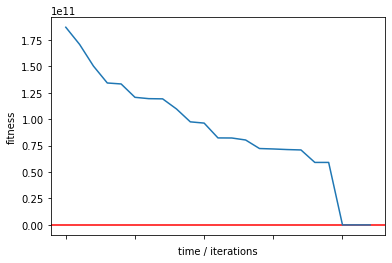

Minimal value 390.0000000339338 [ fitness = 3.393381575733656e-08 ] is reached for solution:

 [-75.42752605 -35.73169866 -57.59564162  38.9098475   52.24768241
 -30.36102782  50.69081358  49.79866021 -71.15514846 -30.78367585
 -43.00095146 -20.08811989  71.52725577  48.01996128 -46.02767979
  -8.16344181 -40.9756445  -13.82735854  35.81656886  57.13778418
  58.5853789  -17.4123197   27.28778312 -62.56236365 -28.81691939
 -86.52863384  48.29261815  -7.58193328 -82.15963813 -72.07887092
  82.24637457  19.58463817 -45.58574604  77.31349622 -12.61296292
 -81.18446096  72.8781611   86.0821849   28.40065495  40.85306911
  -2.04659211  33.4408696  -24.67059429 -17.82065203   2.58348364
 -81.80820033  88.44453757 -34.27037924 -43.83515599  19.81854772]


In [3]:
# input data
dimension = 50
shift = data[:dimension]
bias = 390
lower = [-100]*dimension
upper = [100]*dimension

# objective function
def rosenbrock(x):
    z = x - shift + 1
    y = np.sum((100*np.square(np.square(z[:-1]) - z[1:]) + np.square(z[:-1] - 1))) + bias
    return y

# search parameters
i_temp = 5230.0  #5230.0 from 0.01 to 5.e4
r_temp = 2e-5  #2e-5 from 0 to 1
step = 2.62  #2.62 from 0 to 3
acceptance = -5  #-5.0 from -1e4 to -5
iterations = 200  #1000
no_local = False

# log steps
val_log = []
def log(sol, val, end):
    val_log.append(val)

# run search
t1 = time()
sa = SA(func=rosenbrock, bounds=list(zip(lower,upper)), no_local_search=no_local, seed=123, maxfun=1e12, maxiter=iterations, initial_temp=i_temp, restart_temp_ratio=r_temp, visit=step, accept=acceptance, callback=log)
t2 = time()

# display results
print('\nROSENBROCK dimension', dimension, '\n\nSimulated Annealing parameters:', '\n\n- Initial temperature =', i_temp, '\n- Minimal temperature =', i_temp*r_temp, '\n- Acceptance (-1e4 to -5) =', acceptance, '\n- Step size (0 to 3) =', step, '\n\nStopping criterion:', sa.message, '\n\n- Computation time =', t2-t1, 'sec.',  '\n- Number of iterations =', sa.nit, '\n- Number of function evaluations =', sa.nfev, '\n- Final local search =', not no_local, '\n\nConvergence curve:')
fig,ax = plt.subplots(1)
plt.axhline(y=bias, color='red')
ax.set_ylabel('fitness')
ax.set_xlabel('time / iterations')
ax.set_xticklabels([])
plt.plot(val_log)
plt.show()
print('Minimal value', sa.fun, '[ fitness =', sa.fun-bias,'] is reached for solution:\n\n', sa.x)